# Ireland boundary

Provinces - OSi National Statutory Boundaries - 2019 - Ungeneralised

- <https://data.gov.ie/dataset/provinces-national-statutory-boundaries-2019>
- <https://data-osi.opendata.arcgis.com/maps/osi::provinces-national-statutory-boundaries-2019>

In [1]:
import os
from zipfile import ZipFile

import matplotlib.pyplot as plt

from h2ss import data as rd

In [2]:
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.major.size"] = 0

In [3]:
URL = (
    "https://data-osi.opendata.arcgis.com/datasets/"
    "559bc3300384413aa0fe93f0772cb7f1_0.zip?"
    "outSR=%7B%22latestWkid%22%3A2157%2C%22wkid%22%3A2157%7D"
)
DATA_DIR = os.path.join("data", "boundaries")
FILE_NAME = "osi-provinces-ungeneralised-2019.zip"
DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

In [4]:
rd.download_data(url=URL, data_dir=DATA_DIR, file_name=FILE_NAME)

Data 'osi-provinces-ungeneralised-2019.zip' already exists in 'data/boundaries'.
Data downloaded on: 2023-10-29 22:11:40.353067+00:00
Download URL: https://data-osi.opendata.arcgis.com/datasets/559bc3300384413aa0fe93f0772cb7f1_0.zip?outSR=%7B%22latestWkid%22%3A2157%2C%22wkid%22%3A2157%7D
SHA256 hash: 2410768c3c1252498812967354f90e42f7dc37003f99df73b3fe544cee85df3d



In [5]:
ZipFile(DATA_FILE).namelist()

['Provinces___Ungen_2019.shp',
 'Provinces___Ungen_2019.shx',
 'Provinces___Ungen_2019.dbf',
 'Provinces___Ungen_2019.cpg',
 'Provinces___Ungen_2019.prj',
 'Provinces_-_National_Statutory_Boundaries_-_2019.xml']

In [6]:
data = rd.read_shapefile_from_zip(data_path=DATA_FILE)

In [7]:
data

,ESRI_OID,OBJECTID,PROVINCE,PV_ID,GUID,CENTROID_X,CENTROID_Y,AREA,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,Connacht,27001,d1070df4-924a-4f2d-b35b-d165b6a5a264,537106.05,774821.52,1.770933e+10,3.682460e+06,1.770933e+10,"MULTIPOLYGON (((456212.468 744200.809, 456200...."
1,2,2,Leinster,27002,567d5f84-9a09-4d9b-b943-0b5be07a15da,664436.40,707866.98,1.979878e+10,1.313867e+06,1.979878e+10,"MULTIPOLYGON (((673229.094 598041.747, 673236...."
2,3,3,Munster,27003,32947409-6cfa-4731-bcd1-1cf12e8193f8,544013.20,616670.03,2.467955e+10,3.631145e+06,2.467955e+10,"MULTIPOLYGON (((430806.128 602244.549, 430815...."
3,4,4,Ulster,27004,0b3f0251-a1d9-47cc-ab6d-295962b93cd0,620526.73,873476.28,8.086132e+09,2.297473e+06,8.086132e+09,"MULTIPOLYGON (((549225.762 882044.879, 549218...."


In [8]:
data.crs

<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
data.shape

(4, 11)

In [10]:
data = data.dissolve()

In [11]:
data.bounds

,minx,miny,maxx,maxy
0,416216.755,519664.6145,734480.7393,966936.905


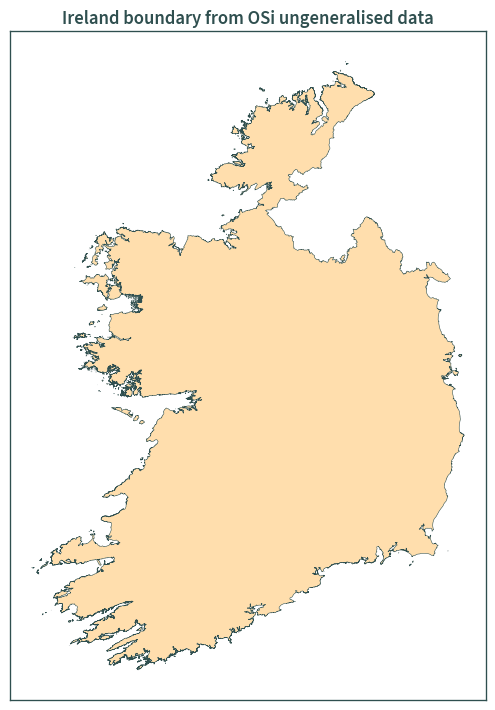

In [12]:
data.plot(
    color="navajowhite",
    figsize=(7.5, 7.5),
    edgecolor="darkslategrey",
    linewidth=0.4,
)

plt.title("Ireland boundary from OSi ungeneralised data")
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()